# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [25]:
df = pd.read_csv("craftcans.csv")
df = df.fillna(0)
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [166]:
num_rows = len(df)
print(num_rows)

2416


In [167]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [168]:
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [169]:
df['ABV'].value_counts().idxmax()

'5.00%'

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [170]:
df['ABV']=df['ABV'].str.replace('%', '')
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70,85


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [171]:
df['ABV']= df['ABV'].astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [172]:
df['ABV'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<Axes: ylabel='Frequency'>

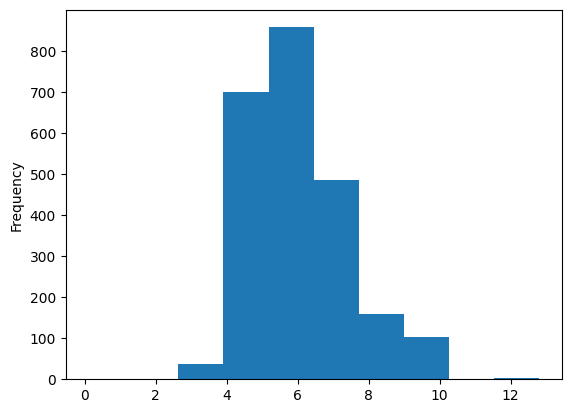

In [173]:
import matplotlib as plot
df['ABV'].plot(kind='hist')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [174]:
df['ABV'].isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [175]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [176]:
brooklyn = df[df['Location'] == 'Brooklyn, NY']
print(brooklyn)

                                 Beer              Brewery      Location  \
115                            4Beans  Sixpoint Craft Ales  Brooklyn, NY   
210                            Jammer  Sixpoint Craft Ales  Brooklyn, NY   
246                           Abigale  Sixpoint Craft Ales  Brooklyn, NY   
404                     Nomader Weiss    Evil Twin Brewing  Brooklyn, NY   
421                               Rad  Sixpoint Craft Ales  Brooklyn, NY   
439                      Molotov Lite    Evil Twin Brewing  Brooklyn, NY   
588                           Bengali  Sixpoint Craft Ales  Brooklyn, NY   
713                     Sensi Harvest  Sixpoint Craft Ales  Brooklyn, NY   
969                            Hi-Res  Sixpoint Craft Ales  Brooklyn, NY   
987             KelSo Nut Brown Lager   KelSo Beer Company  Brooklyn, NY   
1057                    Global Warmer  Sixpoint Craft Ales  Brooklyn, NY   
1074               Autumnation (2013)  Sixpoint Craft Ales  Brooklyn, NY   
1093        

## What brewery in Brooklyn puts out the most different cans of beer?

In [177]:
brooklyn_brewery = brooklyn.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False)
print(brooklyn_brewery)

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        5
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64


## What are the five most common styles of beer produced by Sixpoint?

In [15]:
sixpoint_beers = df[df['Brewery'] == 'Sixpoint Craft Ales']
print(sixpoint_beers)
#sixpoint_beers['Style'].value_counts().head(5)

                              Beer              Brewery      Location  \
115                         4Beans  Sixpoint Craft Ales  Brooklyn, NY   
210                         Jammer  Sixpoint Craft Ales  Brooklyn, NY   
246                        Abigale  Sixpoint Craft Ales  Brooklyn, NY   
421                            Rad  Sixpoint Craft Ales  Brooklyn, NY   
588                        Bengali  Sixpoint Craft Ales  Brooklyn, NY   
713                  Sensi Harvest  Sixpoint Craft Ales  Brooklyn, NY   
969                         Hi-Res  Sixpoint Craft Ales  Brooklyn, NY   
1057                 Global Warmer  Sixpoint Craft Ales  Brooklyn, NY   
1074            Autumnation (2013)  Sixpoint Craft Ales  Brooklyn, NY   
1267                     The Crisp  Sixpoint Craft Ales  Brooklyn, NY   
1268                  Sweet Action  Sixpoint Craft Ales  Brooklyn, NY   
1269                 Righteous Ale  Sixpoint Craft Ales  Brooklyn, NY   
1270                 Bengali Tiger  Sixpoint Craft 

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [179]:
new_york=df[df['Location'].str.contains('NY', na=False)]
print(new_york)

                          Beer                  Brewery           Location  \
115                     4Beans      Sixpoint Craft Ales       Brooklyn, NY   
210                     Jammer      Sixpoint Craft Ales       Brooklyn, NY   
246                    Abigale      Sixpoint Craft Ales       Brooklyn, NY   
404              Nomader Weiss        Evil Twin Brewing       Brooklyn, NY   
421                        Rad      Sixpoint Craft Ales       Brooklyn, NY   
...                        ...                      ...                ...   
2351   Brooklyn Lager (12 oz.)         Brooklyn Brewery       Brooklyn, NY   
2364  Heinnieweisse Weissebier  Butternuts Beer and Ale  Garrattsville, NY   
2365           Snapperhead IPA  Butternuts Beer and Ale  Garrattsville, NY   
2366         Moo Thunder Stout  Butternuts Beer and Ale  Garrattsville, NY   
2367         Porkslap Pale Ale  Butternuts Beer and Ale  Garrattsville, NY   

                           Style             Size   ABV        

### Now *count* all of the breweries in New York state

In [180]:
new_york['Brewery'].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [181]:
 df[df['Style'].str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [26]:
df['IBUs'].mean()

TypeError: can only concatenate str (not "int") to str

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [34]:
df['IBUs'].fillna(0)
df['IBUs'] = df['IBUs'].astype(float)
df['IBUs'].mean().round(2)

24.84

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<Axes: ylabel='Frequency'>

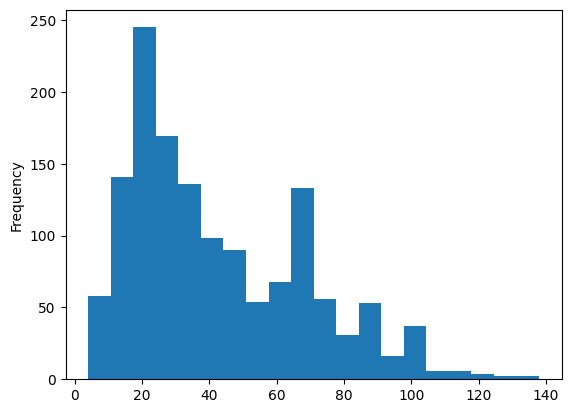

In [53]:
import matplotlib as plot
filtered_df = df[df['IBUs'] != 0] 
filtered_df['IBUs'].plot(kind='hist', bins = 20)


## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [61]:
seventy_five = df['IBUs'].quantile(0.75)
df[df['IBUs'] > seventy_five]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.90%,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


## List all of the beers with IBUs below the 25th percentile

In [64]:
twenty_five = df['IBUs'].quantile(0.25)
df[df['IBUs'] < twenty_five]

,Beer,Brewery,Location,Style,Size,ABV,IBUs


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: ylabel='Style'>

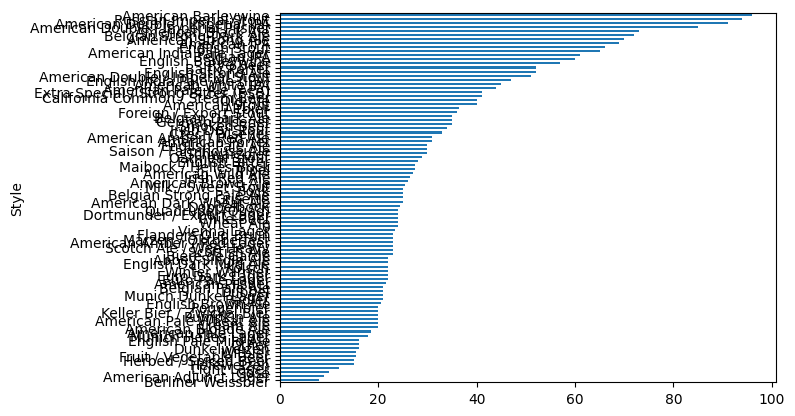

In [71]:
filtered_df = df[df['IBUs'] != 0] 
filtered_df.groupby('Style')['IBUs'].median().sort_values(na_position='last').plot(kind='barh')

# # Plotting the bar graph
# plt.figure(figsize=(10, 6))
# median_ibus_by_style.plot(kind='barh', color='skyblue', edgecolor='black')
# plt.title('Median IBUs of Each Beer Style')
# plt.xlabel('Median IBU')
# plt.ylabel('Beer Style')
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.show()


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [80]:

filtered_df=df[df['IBUs'] != 0] 

ibu_threshold_high = filtered_df['IBUs'].quantile(0.75)
high_ibu_beers = df[df['IBUs'] > ibu_threshold_high]

ibu_threshold_low = filtered_df['IBUs'].quantile(0.25)
low_ibu_beers = df[df['IBUs'] < ibu_threshold_low]

top_high_ibu_styles = high_ibu_beers['Style'].value_counts().head(5)

top_low_ibu_styles = low_ibu_beers['Style'].value_counts().head(5)

print("Top 5 High-IBU Beers:")
print(top_high_ibu_styles)

print("Top 5 Low-IBU Beers:")
print(top_low_ibu_styles)


Top 5 High-IBU Beers:
Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64
Top 5 Low-IBU Beers:
Style
American IPA                123
American Pale Ale (APA)      95
American Blonde Ale          83
American Pale Wheat Ale      79
American Amber / Red Ale     71
Name: count, dtype: int64


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [82]:
wheat_beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
wheat_beers_df = df[df['Style'].isin(wheat_beer_styles)]
average_ibu_wheat_beers = wheat_beers_df['IBUs'].mean().round(2)
print(average_ibu_wheat_beers)

11.31


## Draw a histogram of the IBUs of those beers

<Axes: ylabel='Frequency'>

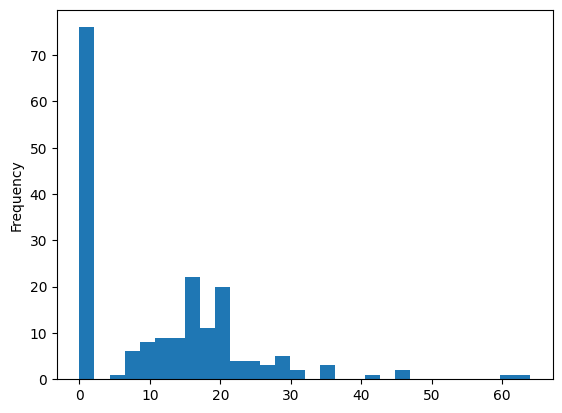

In [88]:
import matplotlib as plot
wheat_beers_df['IBUs'].dropna().plot(kind='hist', bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

Average IBU for Styles with 'IPA' 49.39


<Axes: xlabel='IBU', ylabel='Frequency'>

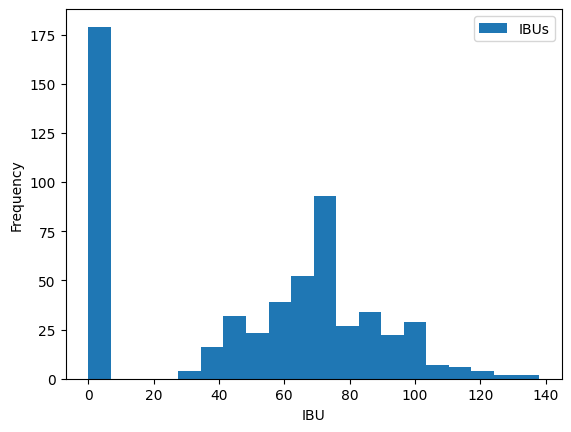

In [93]:
import matplotlib as plot
ipa_beers_df = df[df['Style'].str.contains("IPA", na=False)]
average_ibu_ipa_beers = ipa_beers_df['IBUs'].mean().round(2)
print("Average IBU for Styles with 'IPA'",average_ibu_ipa_beers)
ipa_beers_df.plot(kind='hist', bins=20, xlabel='IBU')

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

In [109]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'IBU')

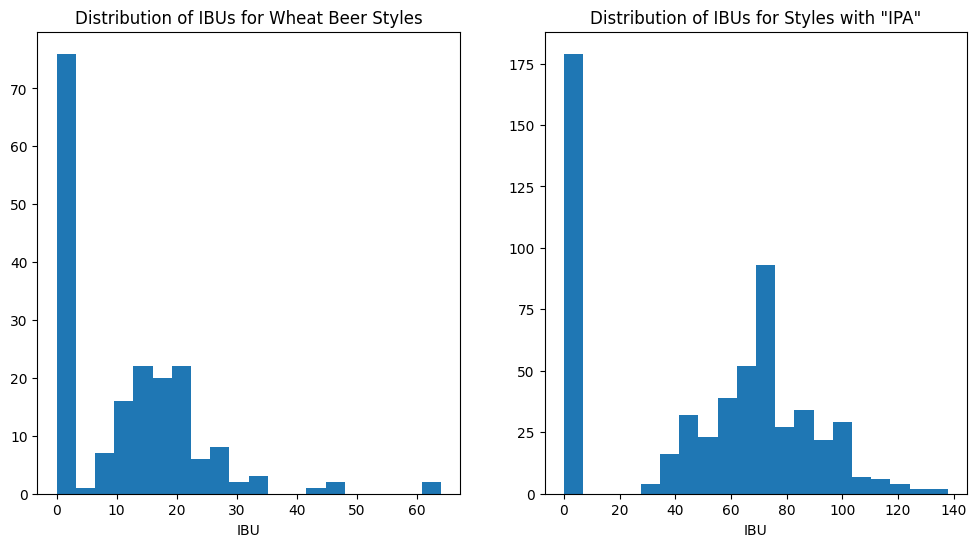

In [124]:
import matplotlib.pyplot as plt

wheat_beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
wheat_beers_df = df[df['Style'].isin(wheat_beers)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(wheat_beers_df['IBUs'].dropna(), bins=20)
plt.title('Distribution of IBUs for Wheat Beer Styles')
plt.xlabel('IBU')

ipa_beers_df = df[df['Style'].str.contains("IPA",na=False)]
plt.subplot(1, 2, 2)
plt.hist(ipa_beers_df['IBUs'].dropna(), bins=20)
plt.title('Distribution of IBUs for Styles with "IPA"')
plt.xlabel('IBU')

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [120]:
wheat_beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
df['ABV']= df['ABV'].astype(float)
wheat_beers_df = df[df['Style'].isin(wheat_beers)]
ipa_beers_df = df[df['Style'].str.contains("IPA", na=False)]


average_abv_wheat_beers = wheat_beers_df['ABV'].mean()
average_abv_ipa_beers = ipa_beers_df['ABV'].mean()

# Display the average ABV for each category
print(f"Average ABV for Wheat Beers: {average_abv_wheat_beers:.2f}%")
print(f"Average ABV for IPAs: {average_abv_ipa_beers:.2f}%")


Average ABV for Wheat Beers: 5.04%
Average ABV for IPAs: 6.88%


## Good work!